In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [25]:
df1 = pd.read_csv('title_location_company_salary.csv')
df2 = pd.read_csv('qualifications.csv')
df3 = pd.read_csv('benefits.csv')

In [26]:
df1.head()

,Unnamed: 0,Title,Company,Location,Salary,Levels
0,0,Data Scientist,Numerdox,"Sacramento, CA",110000.0,Jr.
1,1,Data Analyst,Cepheid,"Lodi, CA",120000.0,Unknown
2,2,Data Scientist,Cepheid,"Sunnyvale, CA",150000.0,Staff
3,3,Data Scientist,Verana Health,"San Francisco, CA",150000.0,Unknown
4,4,Data Scientist,Tinder,"San Francisco, CA",130000.0,Jr.


In [27]:
df1 = df1.drop('Unnamed: 0',axis = 1)
df2 = df2.drop('Unnamed: 0',axis = 1)
df3 = df3.drop('Unnamed: 0',axis = 1)

In [30]:
for i in df2.columns:
    df2.loc[:,i] = df2.loc[:,i].astype('Int64')
    
for i in df3.columns:
    df3.loc[:,i] = df3.loc[:,i].astype('Int64')

In [31]:
pd.pivot_table(df1, 'Salary', index = 'Title', columns = 'Levels')

Levels,Distinguished,Jr.,Lead,Principal,Sr.,Staff,Unknown
Title,,,,,,,
Applied Scientist,NaN,NaN,NaN,130000.000000,157142.857143,156666.666667,146666.666667
Data Analyst,NaN,82666.666667,150000.000000,96000.000000,132699.250000,130000.000000,95044.444444
Data Architect,190000.0,NaN,NaN,NaN,170000.000000,NaN,200000.000000
Data Engineer,NaN,NaN,NaN,NaN,139310.344828,NaN,133846.153846
Data Science Manager,NaN,NaN,NaN,NaN,NaN,NaN,160365.079365
Data Scientist,NaN,126736.000000,169545.454545,179760.000000,165748.325359,151021.000000,131012.383333
Director of Data Science,NaN,NaN,NaN,NaN,NaN,NaN,231909.090909
Head of Data Science,NaN,NaN,NaN,NaN,NaN,NaN,175000.000000
Machine Learning Engineer,NaN,154000.000000,172000.000000,200000.000000,176176.121951,167500.000000,143733.333333


<AxesSubplot:xlabel='Salary', ylabel='Density'>

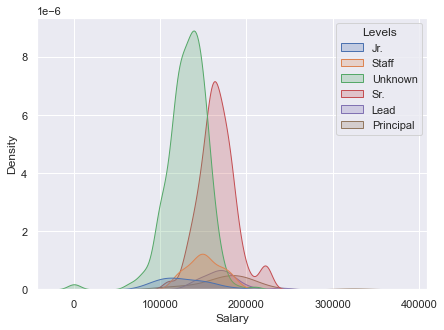

In [6]:
plt.figure(figsize= (7,5))
sns.kdeplot(data = df1[df1.Title == 'Data Scientist'], x  = 'Salary', hue = 'Levels', shade = 'fill')

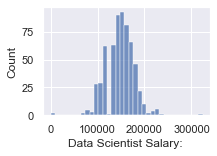

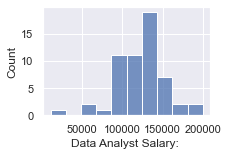

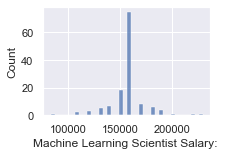

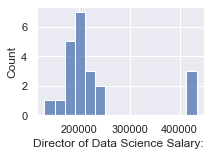

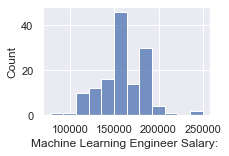

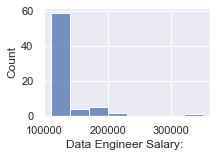

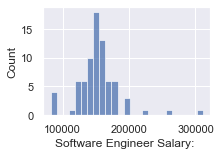

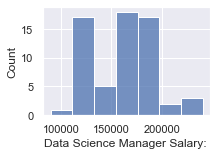

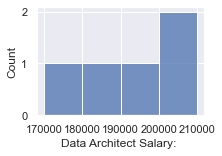

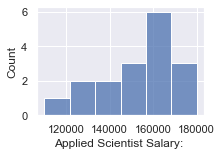

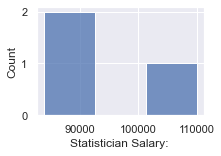

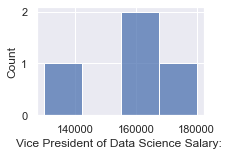

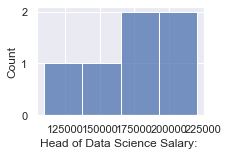

In [7]:
for i in df1.Title.unique():
    plt.figure(figsize = (3,2))
    sns.histplot(data = df1[df1.Title == i], x = 'Salary',)
    plt.xlabel('{} Salary: '.format(i))
    plt.show()

In [8]:
df1.isna().count()

Title       1287
Company     1287
Location    1287
Salary      1287
Levels      1287
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1287 non-null   object 
 1   Company   1285 non-null   object 
 2   Location  1116 non-null   object 
 3   Salary    1209 non-null   float64
 4   Levels    1287 non-null   object 
dtypes: float64(1), object(4)
memory usage: 50.4+ KB


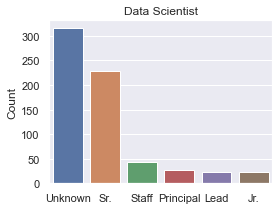

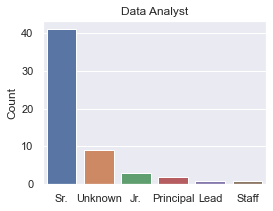

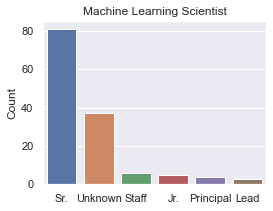

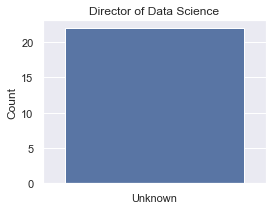

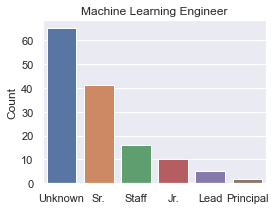

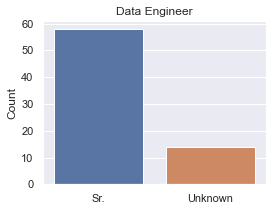

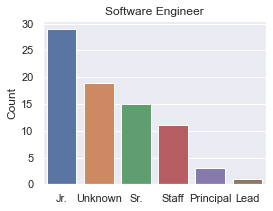

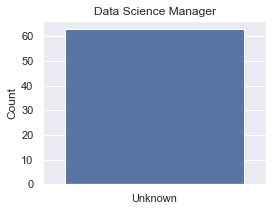

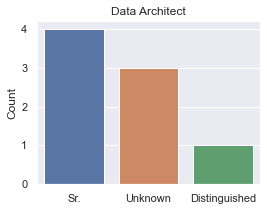

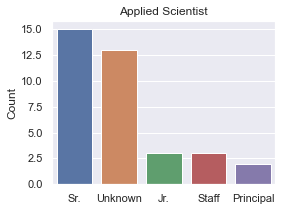

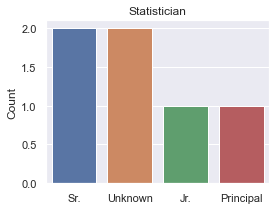

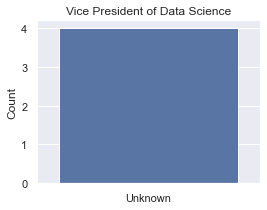

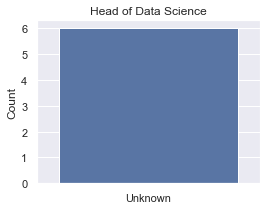

In [10]:
for i in df1.Title.unique():
    plt.figure(figsize = (4,3))
    plt.title('{}'.format(i))
    sns.barplot(x = df1[df1.Title == i]["Levels"].value_counts().index,y= df1[df1.Title == i ]['Levels'].value_counts().values)
    plt.ylabel('Count')
    plt.show()

In [11]:
salary_median = df1.groupby('Title').median().sort_values(by = 'Salary',ascending = False).index

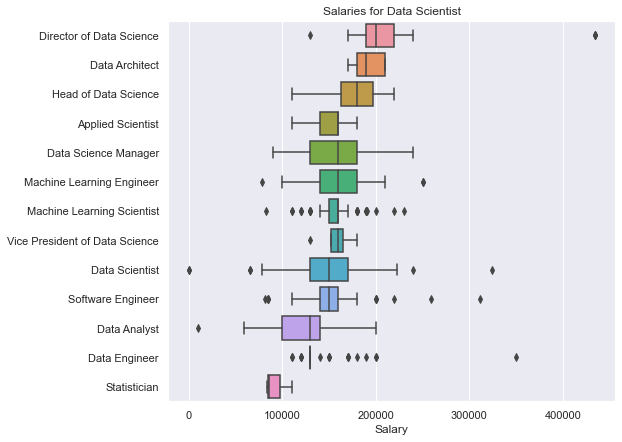

In [12]:
plt.figure(figsize = (8,7))
sns.boxplot(y = df1.Title, x= df1.Salary, order = salary_median)
plt.ylabel('')
plt.title('Salaries for Data Scientist')
plt.show()

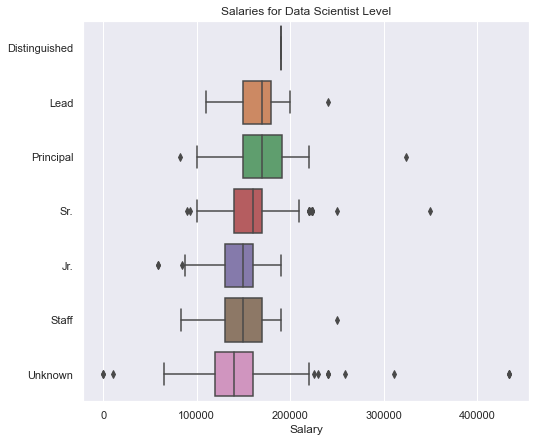

In [13]:
salary_median = df1.groupby('Levels').median().sort_values(by = 'Salary',ascending = False).index
plt.figure(figsize = (8,7))
sns.boxplot(y = df1.Levels, x= df1.Salary, order = salary_median)
plt.ylabel('')
plt.title('Salaries for Data Scientist Level')
plt.show()

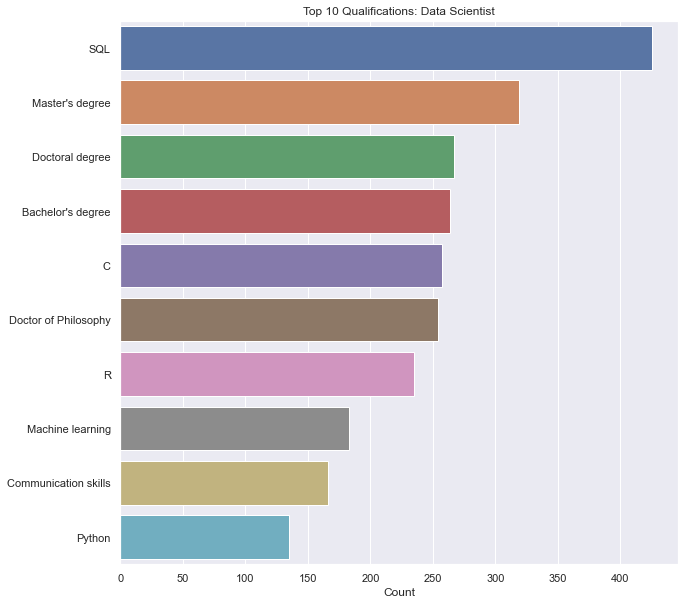

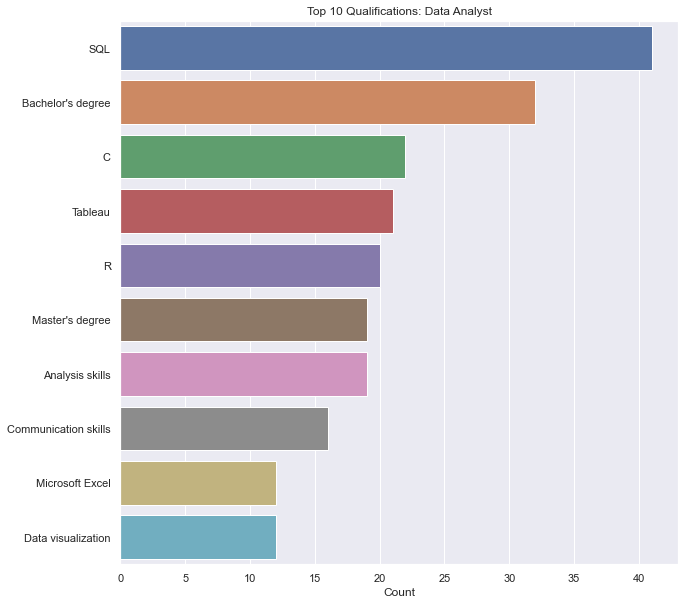

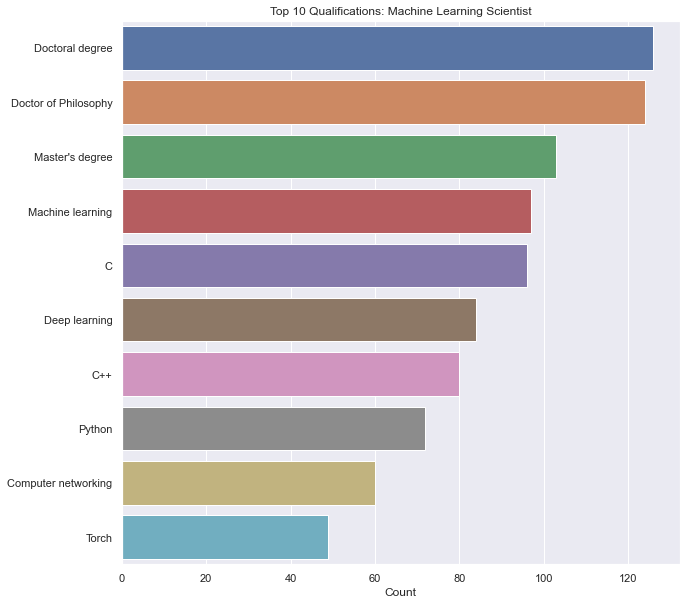

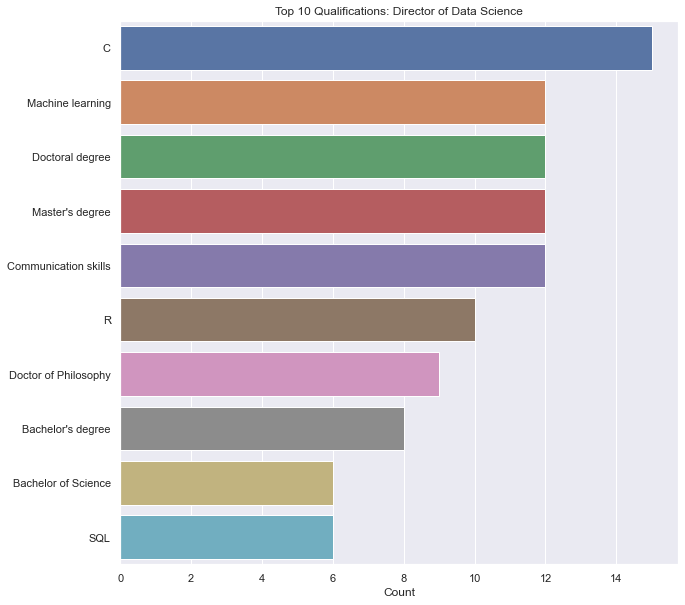

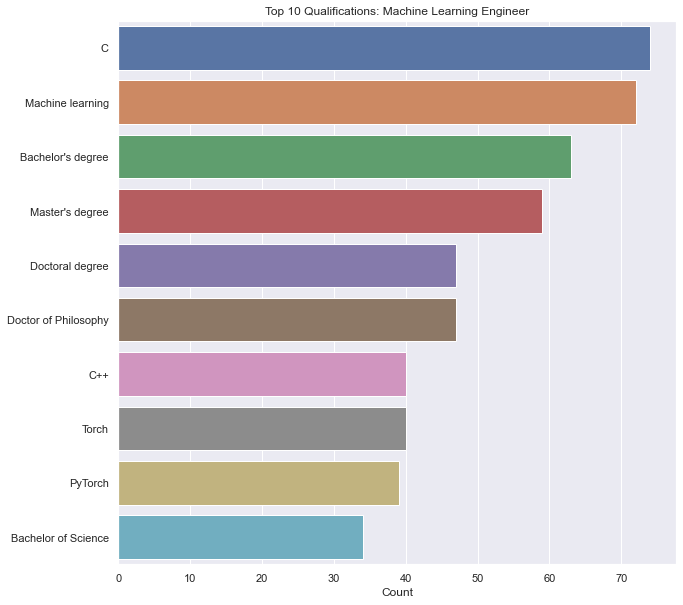

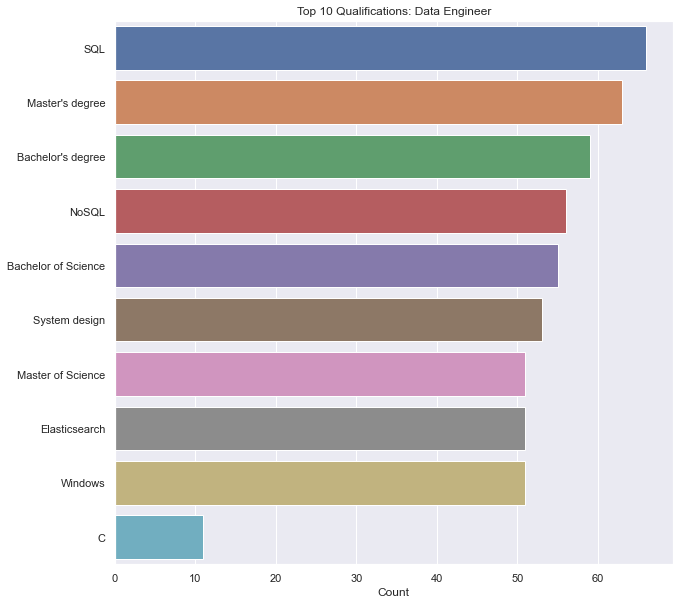

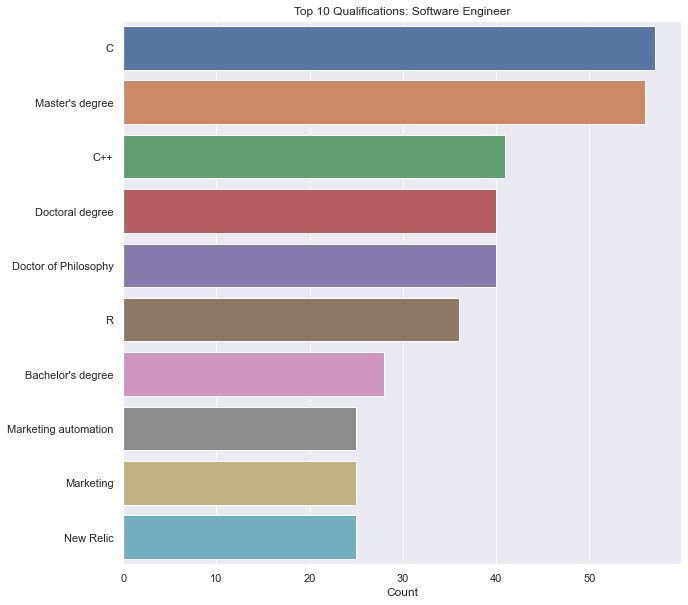

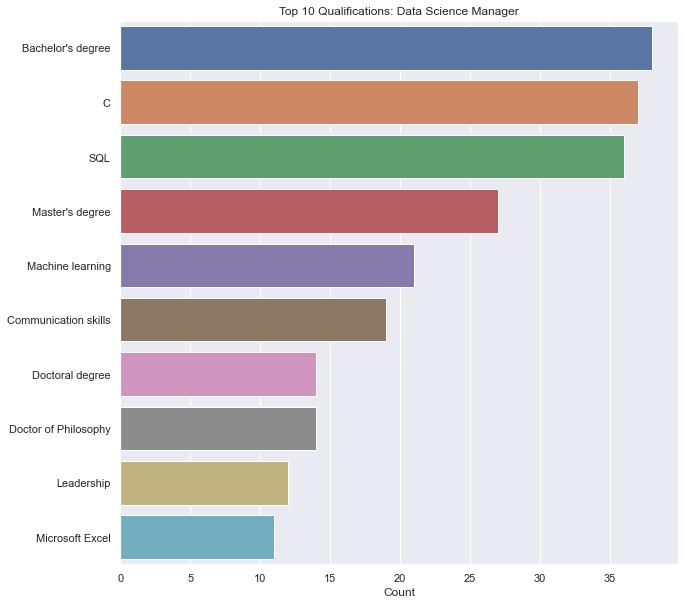

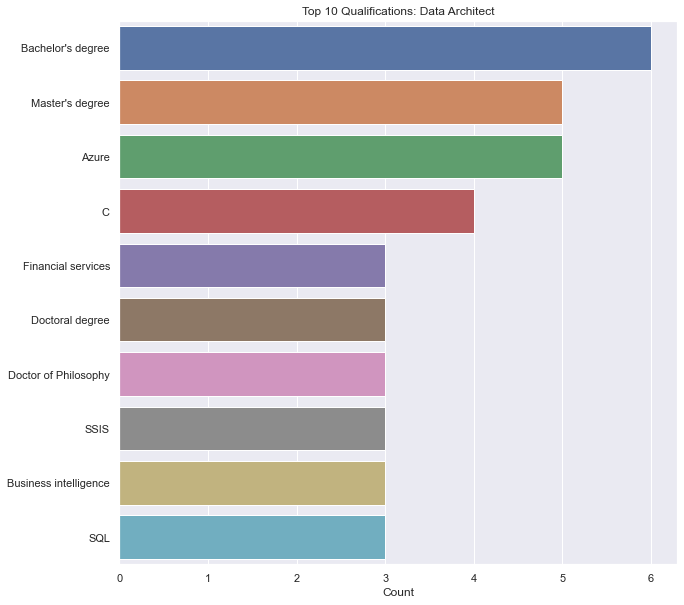

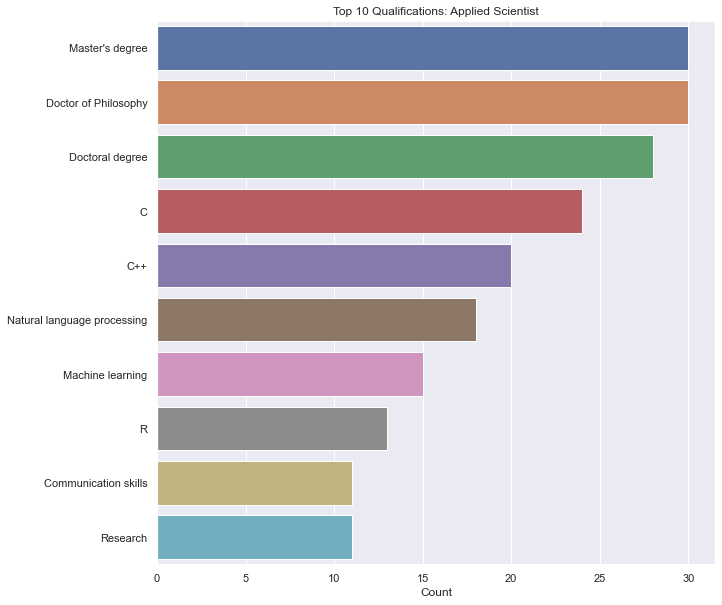

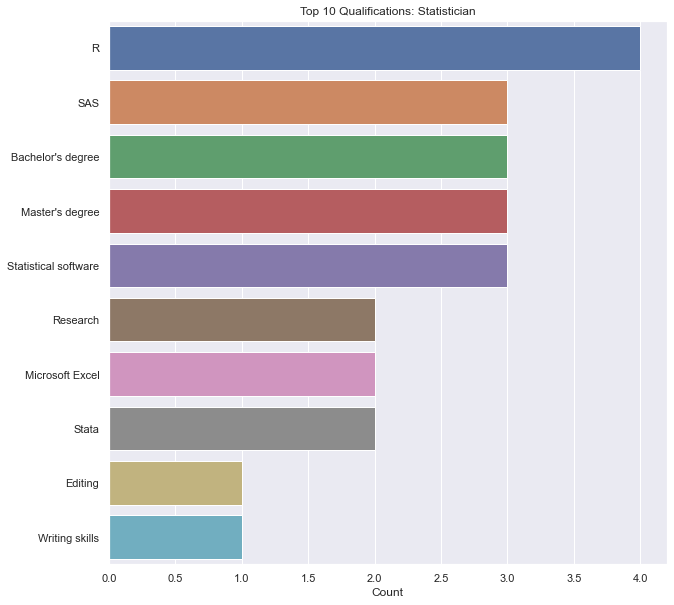

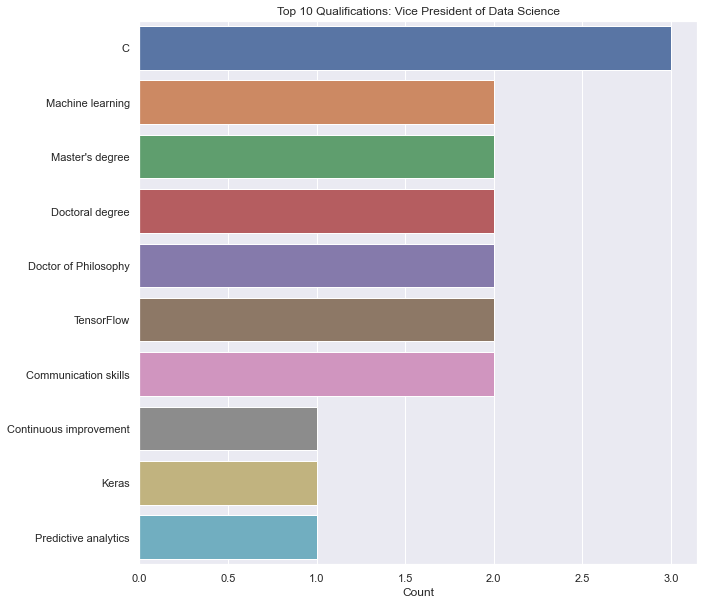

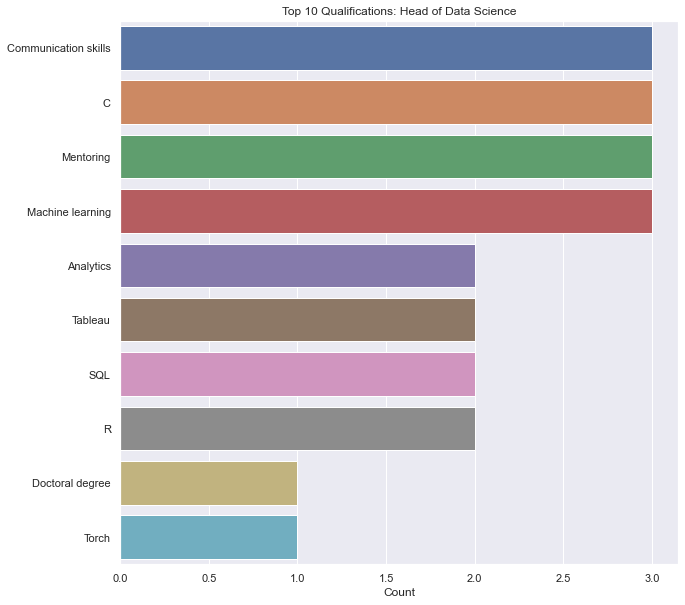

In [35]:
for i in df1.Title.unique():
    qual_index = df2.loc[df1[df1.Title == i].index, :].sum(axis=0).sort_values(ascending=False).index
    qual_counts = df2.loc[df1[df1.Title == i].index, :].sum(axis=0).sort_values(ascending=False).values
    plt.figure(figsize=(10, 10))
    sns.barplot(y=qual_index[0:10], x=qual_counts[0:10])
    plt.title('Top 10 Qualifications: {}'.format(i))
    plt.xlabel('Count')
    plt.show()

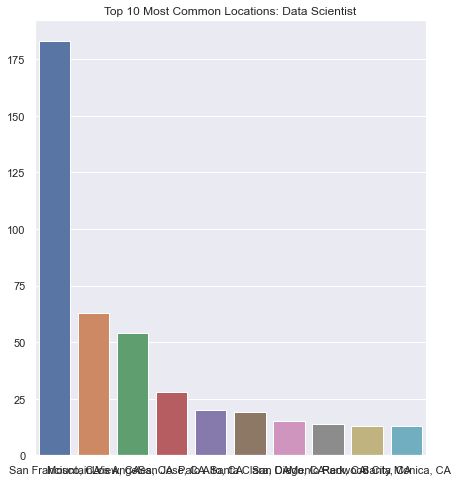

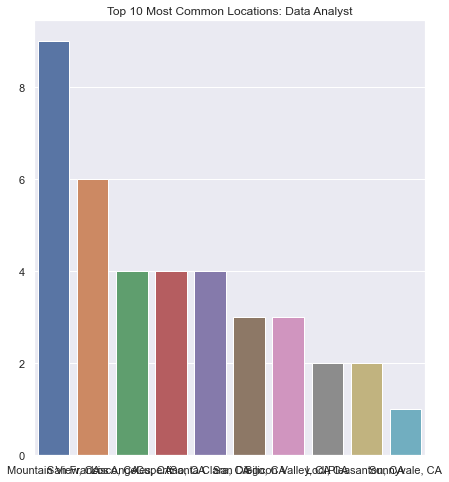

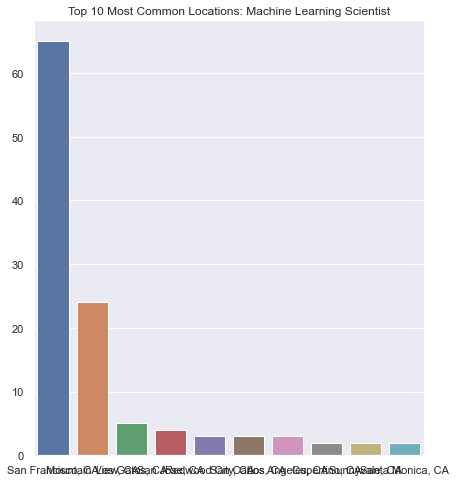

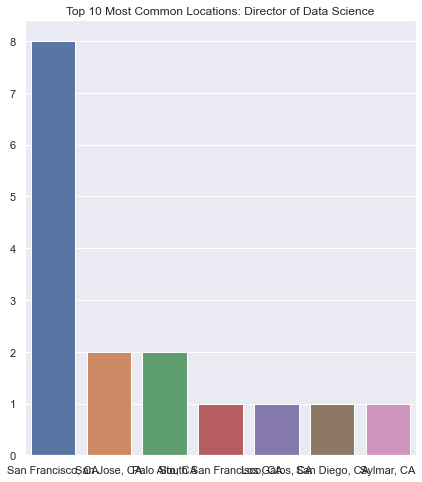

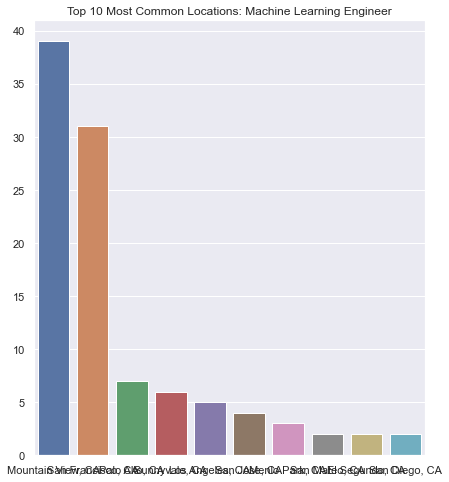

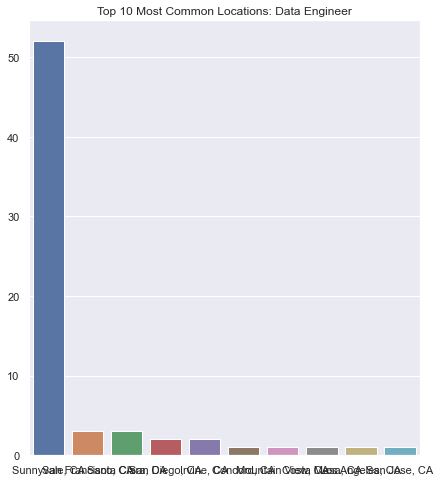

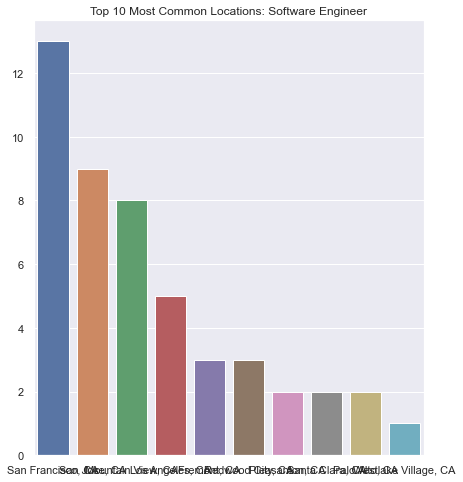

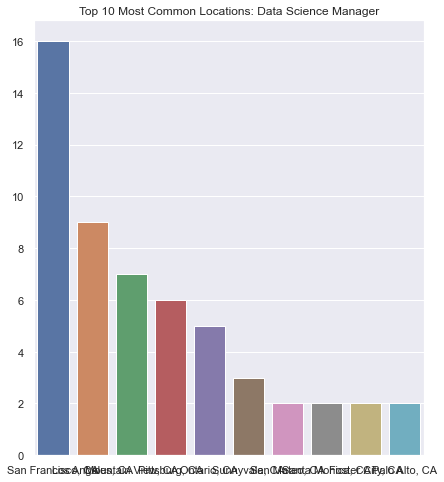

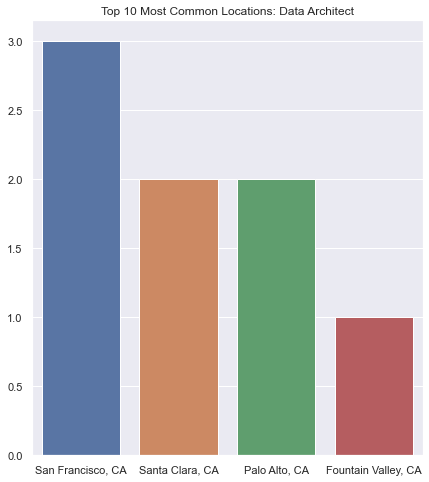

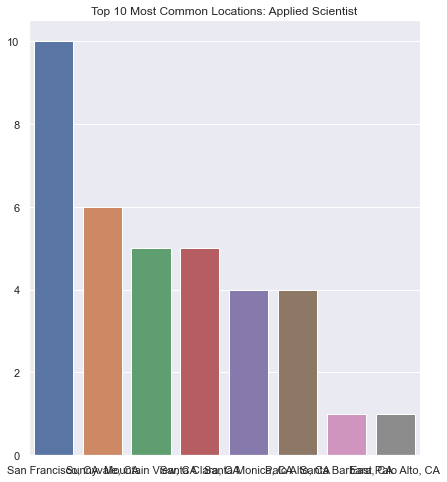

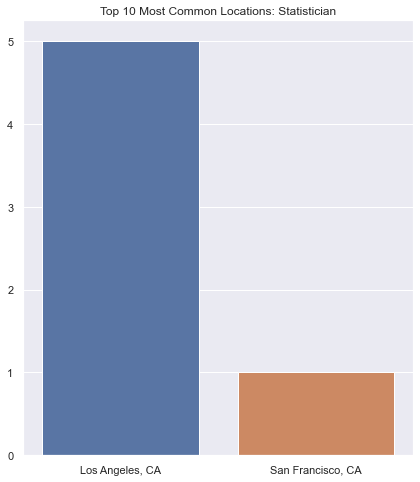

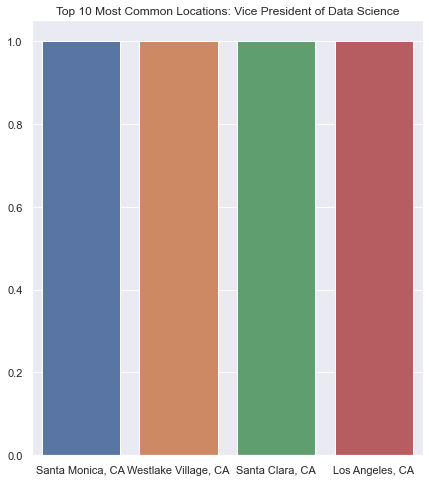

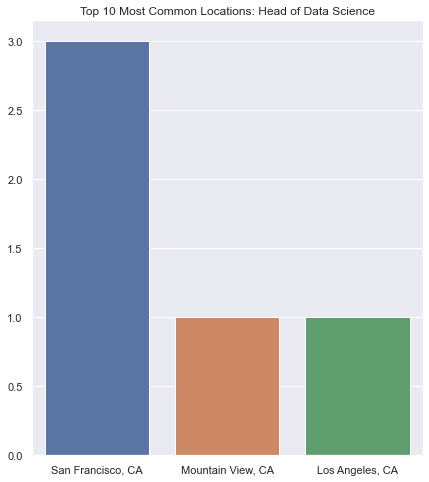

In [23]:
for i in df1.Title.unique():
    location_index = df1[df1.Title == i]['Location'].value_counts().index
    location_values = df1[df1.Title == i]['Location'].value_counts().values
    plt.figure(figsize = (7,8))
    plt.title('Top 10 Most Common Locations: {}'.format(i))
    sns.barplot(x = location_index[0:10], y = location_values[0:10])
    plt.show()

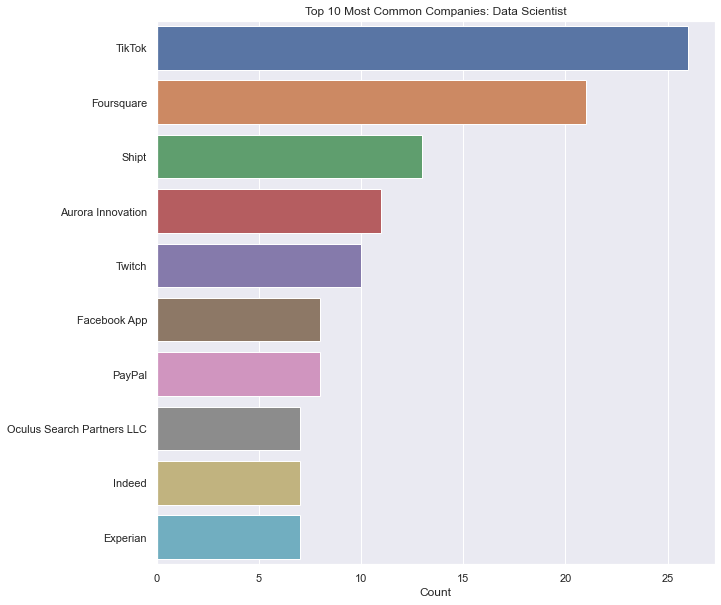

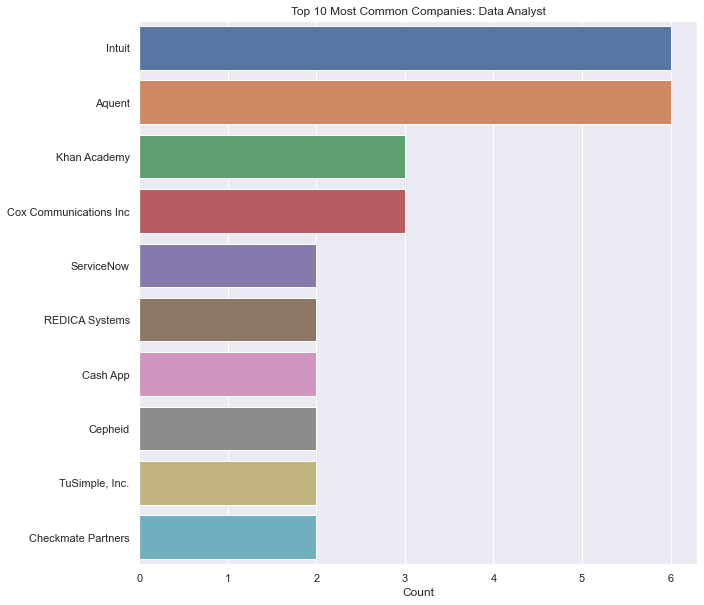

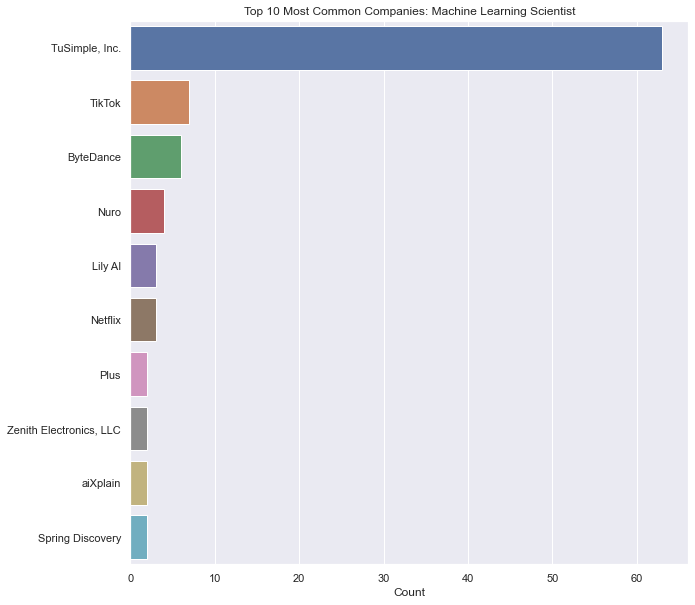

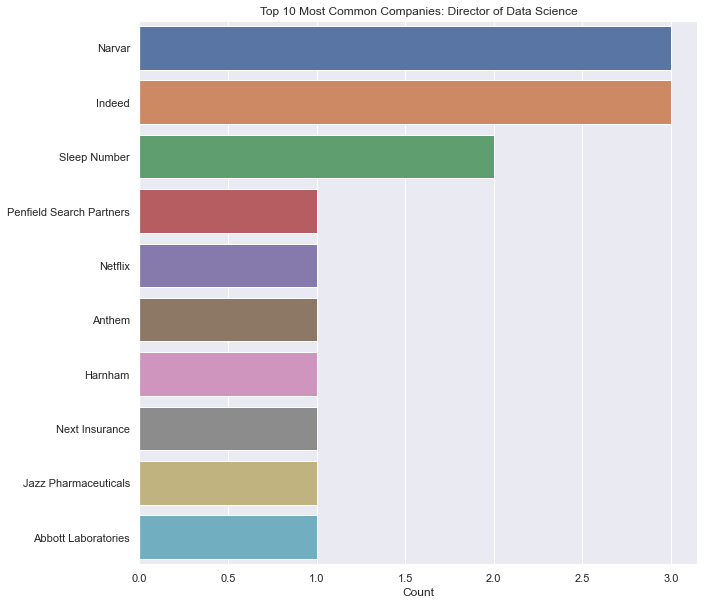

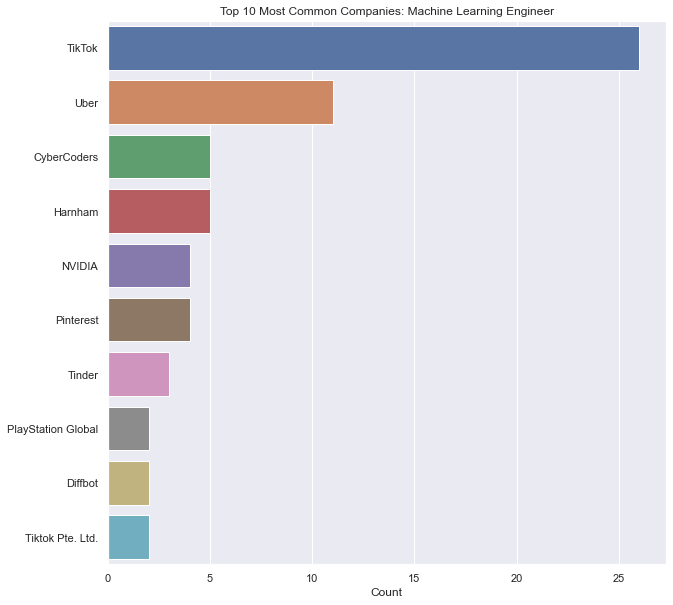

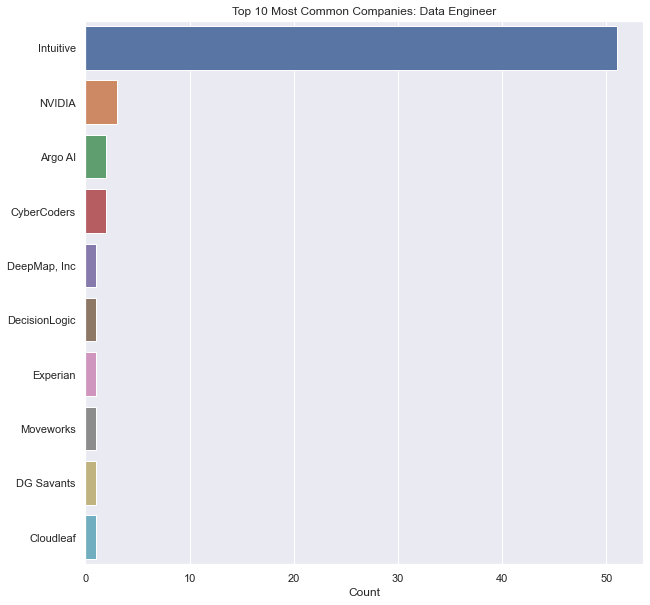

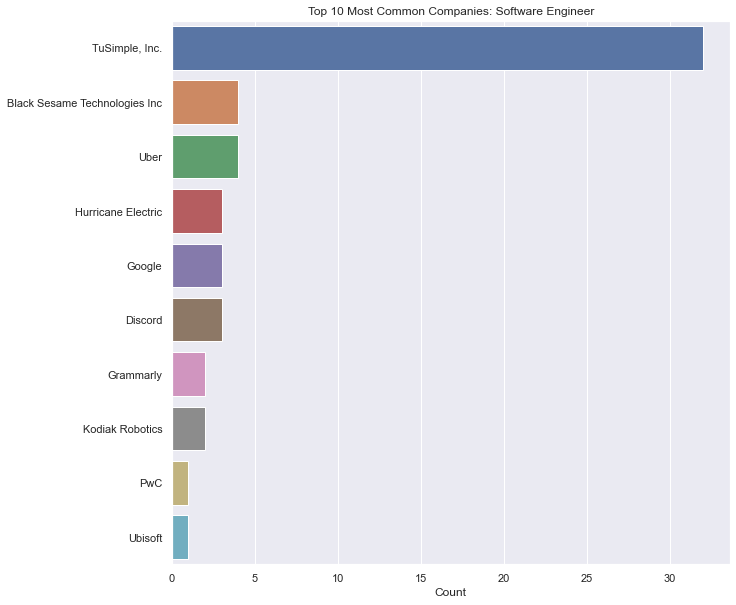

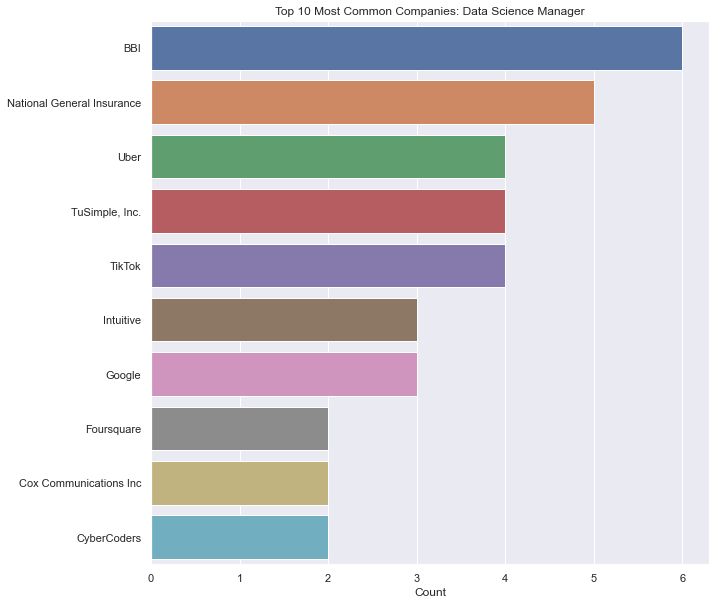

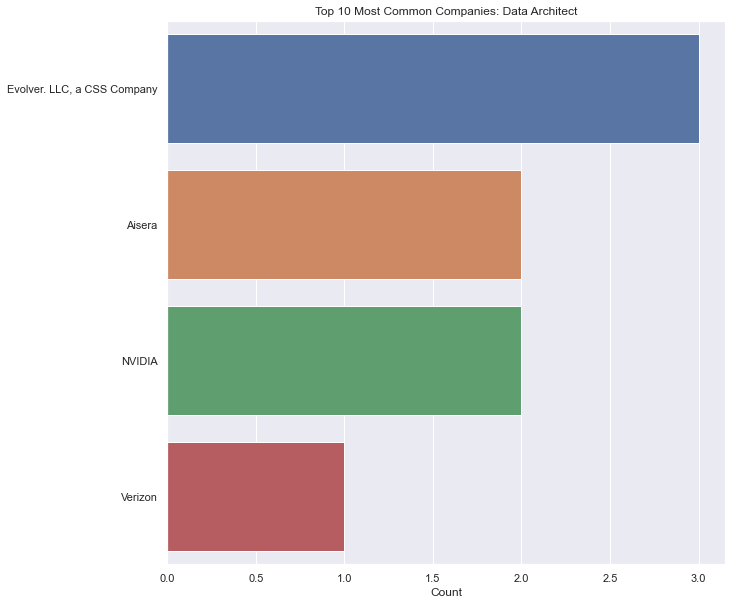

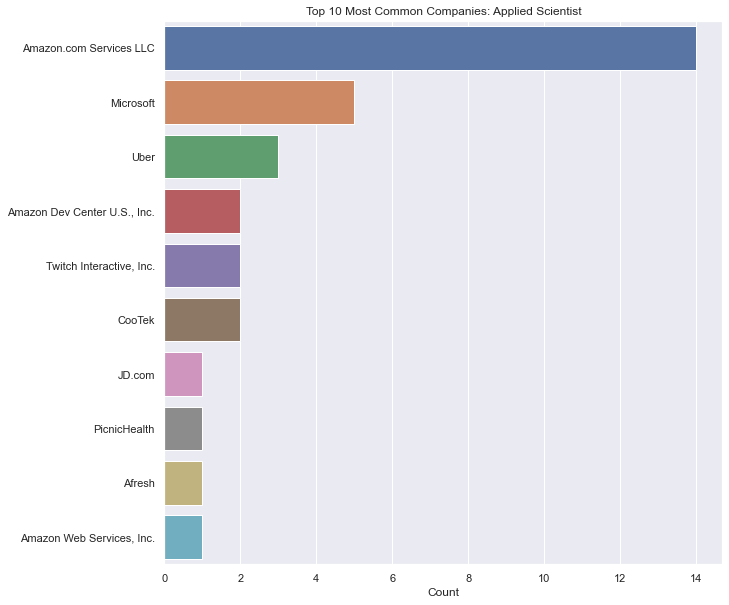

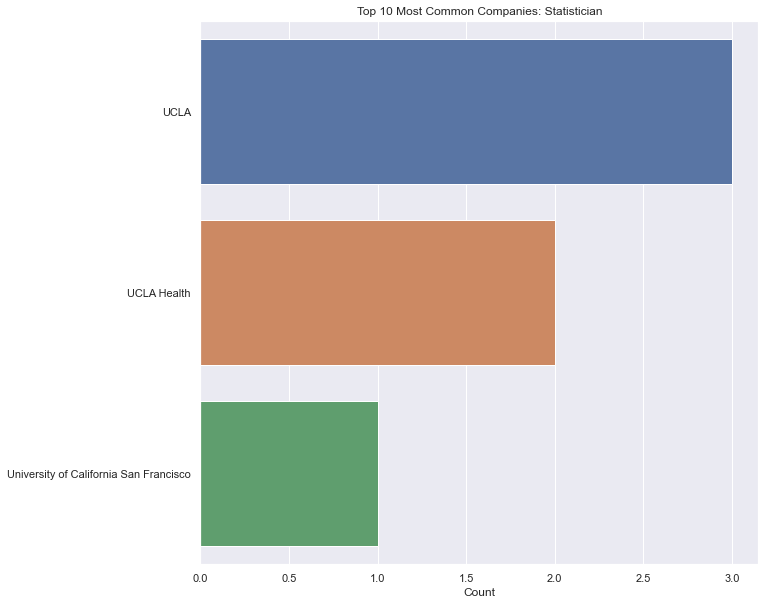

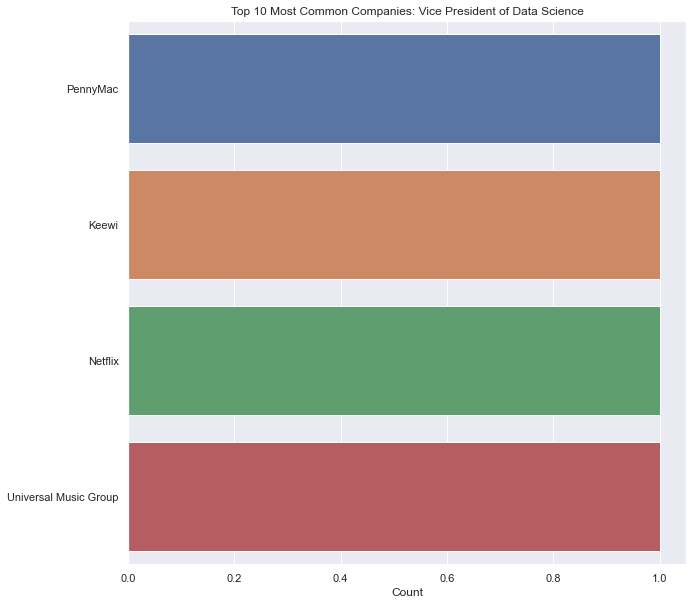

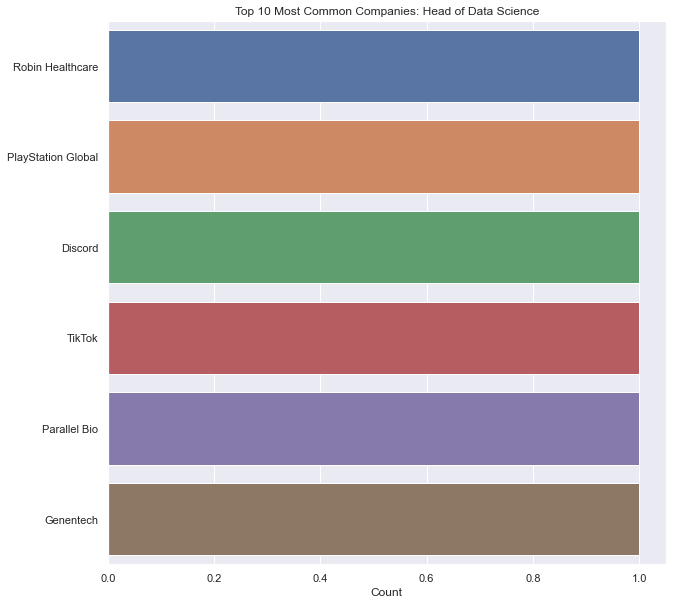

In [36]:
for i in df1.Title.unique():
    company_index = df1[df1.Title == i]['Company'].value_counts().index
    company_counts = df1[df1.Title == i]['Company'].value_counts().values
    plt.figure(figsize=(10, 10))
    sns.barplot(y=company_index[0:10], x=company_counts[0:10])
    plt.title('Top 10 Most Common Companies: {}'.format(i))
    plt.xlabel('Count')
    plt.show()

In [39]:
from sklearn.impute import SimpleImputer
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df1.loc[:,'Location'] = imp_most_frequent.fit_transform(df1.loc[:,'Location'].values.reshape(-1,1))

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1287 non-null   object 
 1   Company   1285 non-null   object 
 2   Location  1287 non-null   object 
 3   Salary    1209 non-null   float64
 4   Levels    1287 non-null   object 
dtypes: float64(1), object(4)
memory usage: 50.4+ KB


In [41]:
knn_impute_salary = df1[~pd.isna(df1.Company)].loc[:,['Title', 'Company', 'Location', 'Salary']]

no_na_salary = knn_impute_salary.loc[~pd.isna(knn_impute_salary.Salary),:]

X = no_na_salary.copy()
y = no_na_salary.pop('Salary')
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)


def reg_performance(regressor, model_name):
    print(model_name)
    print('Best Score: {} +/- {}'.format(str(regressor.best_score_),str(regressor.cv_results_['std_test_score'][regressor.best_index_])))
    print('Best Parameters: ' + str(regressor.best_params_))

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
param_grid = { 'n_neighbors' : [1,2,3,4,5,7,9,11,13,15],
               'weights' : ['uniform','distance']}
reg_knn = GridSearchCV(knn, param_grid = param_grid, cv = 10, scoring='neg_mean_squared_error', n_jobs = -1)
best_reg_knn = reg_knn.fit(X_train,y_train)
reg_performance(best_reg_knn,'kNeighborsRegressor')

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
knn = KNeighborsRegressor(n_neighbors= 2, weights= 'distance')
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print('KNeighborsRegressor')
print('MSE: {}'.format(mean_squared_error(y_test,pred_knn)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,pred_knn))))
print('MAE: {}'.format(mean_absolute_error(y_test,pred_knn)))
print('R-squared: {}'.format(r2_score(y_test,pred_knn)))

kNeighborsRegressor
Best Score: -1646405.4783655154 +/- 2690295.371380099
Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
KNeighborsRegressor
MSE: 297665.04961600044
RMSE: 545.5868854875458
MAE: 67.62581687997942
R-squared: 0.9997541193622997


In [43]:
from sklearn.impute import KNNImputer
knn_impute_salary = pd.get_dummies(knn_impute_salary)
imputer = KNNImputer(n_neighbors=2, weights='distance')
result = pd.DataFrame(imputer.fit_transform(knn_impute_salary))

imputed_salary = result.iloc[:,0]

j = 0
for i in df1[~pd.isna(df1.Company)].index:
    df1.loc[i,'Salary'] = imputed_salary[j]
    j+=1

imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df1.loc[:,['Location','Company']] = imp_most_frequent.fit_transform(df1.loc[:,['Location','Company']])

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1287 non-null   object 
 1   Company   1287 non-null   object 
 2   Location  1287 non-null   object 
 3   Salary    1287 non-null   float64
 4   Levels    1287 non-null   object 
dtypes: float64(1), object(4)
memory usage: 50.4+ KB


In [45]:
imputer_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df2 = pd.DataFrame(imputer_most_frequent.fit_transform(df2), columns = df2.columns)

pd.isna(df2).sum().sum()

0

In [47]:
df_modeling = pd.concat([df1, df2], axis=1)
df_modeling.shape
df_modeling.columns

df_no_drop_first = pd.DataFrame(pd.get_dummies(df_modeling.copy()))

df_modeling_drop_first = pd.DataFrame(pd.get_dummies(df_modeling.copy(), drop_first=True))
dropped_columns = list(set(df_no_drop_first.columns) - set(df_modeling_drop_first.columns))

In [49]:
for i in df_modeling_drop_first.columns[1:]:
    df_modeling_drop_first.loc[:,i] = df_modeling_drop_first.loc[:,i].astype('Int64')

In [50]:
X_drop_first = df_modeling_drop_first.copy()
y = X_drop_first.pop('Salary')

In [51]:
X_drop_first.shape

(1287, 986)

In [52]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_drop_first)
model = sm.OLS(y.astype(float),X_sm.astype(int))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     14.44
Date:                Mon, 27 Jun 2022   Prob (F-statistic):          1.63e-161
Time:                        12:11:56   Log-Likelihood:                -13127.
No. Observations:                1287   AIC:                         2.787e+04
Df Residuals:                     480   BIC:                         3.203e+04
Df Model:                         806                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                             1.721e+05   2.59e+04      6.650      0.000    1.21e+05    2.23e+05
Analysis skills                                                   1568.1528   3150.382      0.498      0.619   -4622.092    7758.397
Communication skills                                              1687.3015   4193.280      0.402      0.688   -6552.152    9926.755
Research                                                         -7264.7381   4040.328     -1.798      0.073   -1.52e+04     674.177
R                                                                -1115.9204   2956.543     -0.377      0.706   -6925.286    4693.445
Machine learning                                                 -1701.4333   2942.585     -0.578      0.563   -7483.372    4080.506
Bachelor's degree                                                -4203.0410   2530.474     -1.661      0.097   -9175.217     769.135
Master's degree                                                   5423.6759   2445.846      2.218      0.027     617.788    1.02e+04
Doctoral degree                                                  -1.154e+04   6766.282     -1.706      0.089   -2.48e+04    1752.196
Doctor of Philosophy                                              2.452e+04   7368.802      3.327      0.001       1e+04     3.9e+04
Power BI                                                          3147.2365   6989.562      0.450      0.653   -1.06e+04    1.69e+04
Relational databases                                             -1.093e+04   6961.624     -1.570      0.117   -2.46e+04    2750.452
Manufacturing                                                     4663.0619   8290.597      0.562      0.574   -1.16e+04     2.1e+04
Microsoft Excel                                                  -8833.6073   6155.664     -1.435      0.152   -2.09e+04    3261.770
Molecular biology                                                -4.811e+04   2.37e+04     -2.032      0.043   -9.46e+04   -1585.793
Product management                                               -1376.1135   5101.609     -0.270      0.787   -1.14e+04    8648.133
Usability                                                        -2.876e+04   1.74e+04     -1.656      0.098   -6.29e+04    5356.171
Natural language processing                                      -5739.1037   3278.657     -1.750      0.081   -1.22e+04     703.191
Python                                                            2326.1333   2833.827      0.821      0.412   -3242.106    7894.373
SQL                                                              -4983.2880   3546.286     -1.405      0.161    -1.2e+04    1984.874
ICD coding              

In [ ]:
X_drop_first.shape